## Introduction
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.



Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization



## Import Libararies 
importing pandas for data manipulation and analysis, matplotlib to plot a scatter plot and seaborn for better visualization.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import Dataset
using pandas to read the csv file and store it into the raw_data variable , then using the .head() function to view the first few rows of the dataset

In [3]:
raw_data = pd.read_csv('Energy_data.csv')

In [4]:
raw_data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Checking for missing values
using .describe function I can see the 'count' row and notice all the observations are 9568 signifying the dataset has no missing values, to further examine for missing values i use the  .isnull().sum() function. I also check the mean, min and max to make sure the data has no outliers( Obeservations that lie at a abnormal distance from other observations)

In [5]:
raw_data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
raw_data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [7]:
data = raw_data


## Define X and Y 
For X I use the pandas .drop method to drop PE since it is my indepdent variable and use every other variable.

In [8]:
x = data.drop(['PE'],axis=1).values
y = data['PE'].values

## checking X and Y values

In [9]:
x

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [10]:
y

array([480.48, 445.75, 438.76, ..., 465.96, 450.93, 451.67])

## Split the dataset in training set and test set
In this cell I import the train_test_split module from sklearn and split x and y into _train and _split varibles with a split train and test of 70/30  and a random state of 9

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.30,random_state=9)

## Train the Model on the Training set 
importing Linear Regression Module from sklearn and storing into variable reg, Then fitting training data into linear Regression model

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

## Predict the test result
using the predict method to predict the x test variable and store it into Y_pred variable.I also visualize the data and take row 3 and 4 , to see how closely the model performs predicting, accurate power output. The predicted value for row 3 was 455.80 while row 4s predicted value is 469.54.

In [30]:
x_test

array([[-0.97975699, -1.06284414,  2.3728189 , -0.04239718],
       [-0.7556586 , -0.98572268, -0.33663167, -1.69108313],
       [-0.83348918, -1.1738046 , -0.05541461,  0.75215027],
       ...,
       [-0.88850735, -1.02664427,  1.50054085,  0.44392065],
       [-1.19177823, -0.74963659, -0.06551822,  0.74324586],
       [ 0.2896866 ,  0.4693546 ,  0.44976573,  1.23778314]])

In [31]:
y_pred = reg.predict(x_test)
y_pred

array([472.7832523 , 472.3204953 , 468.4358581 , ..., 469.96024529,
       472.52182554, 446.00918801])

In [16]:
data

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [32]:
reg.predict([[19.07,49.69,1007.22,76.79]])

array([123.73781112])

In [18]:
reg.predict([[11.80,40.66,1017.13,97.20]])

array([469.54701369])

## Evaluate the Model
Importing the r2 score function from sklearn metrics, i use it to check the r^2 score of y_test and y_predict to see we have a score of 92%.

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9296648852839826

## Plot the Results
using matplotlib I plot the y_test data and the y_pred into a scatter plot to visualize how close predicted values are to actaul values

Text(0.5, 1.0, 'Actual vs Predicted')

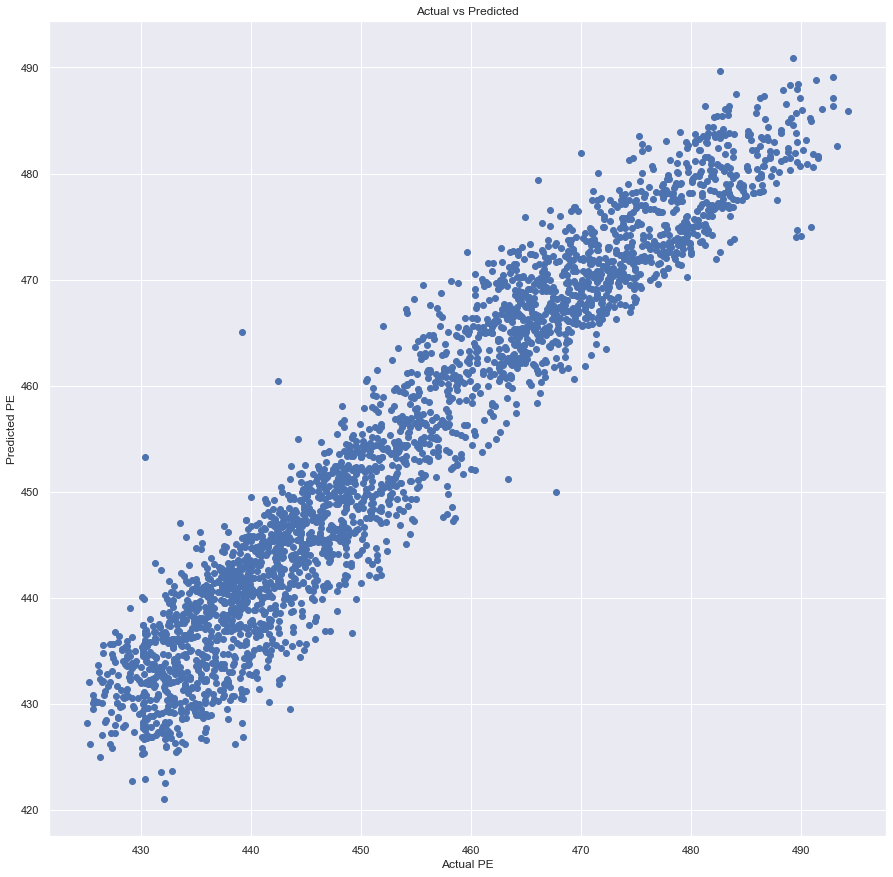

In [34]:
plt.figure(figsize=(15,15)) 
plt.scatter(y_test,y_pred)
plt.xlabel('Actual PE')
plt.ylabel('Predicted PE')
plt.title('Actual vs Predicted')


## Predicted Values
A new data frame is made using the pandas method of Actual values , predicted values and the differnce between the two, the first 30 rows are then presented

In [35]:
pred_y_data = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Differences':y_test - y_pred})
pred_y_data[0:30]

,Actual Value,Predicted Value,Differences
0,476.88,472.783252,4.096748
1,465.87,472.320495,-6.450495
2,469.67,468.435858,1.234142
3,483.43,482.714348,0.715652
4,469.22,474.648481,-5.428481
5,469.23,468.526202,0.703798
6,442.84,446.767698,-3.927698
7,433.16,433.558367,-0.398367
8,473.46,470.774141,2.685859
9,483.61,478.993799,4.616201


## Source:

Pınar Tüfekci, Çorlu Faculty of Engineering, Namık Kemal University, TR-59860 Çorlu, Tekirdağ, Turkey
Email: ptufekci '@' nku.edu.tr

Heysem Kaya, Department of Computer Engineering, Boğaziçi University, TR-34342, Beşiktaş, İstanbul, Turkey
Email: heysem '@' boun.edu.tr

Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615, [Web Link].
([Web Link])

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)


https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

